In [27]:

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st



# Mostrar até 10 linhas no máximo
pd.set_option("display.max_rows", 10)

# Mostrar até 10 colunas (se quiser limitar também)
pd.set_option("display.max_columns", 10)

# Reduzir a largura de cada coluna para caber melhor na tela
pd.set_option("display.max_colwidth", 30)

# Evitar quebra de linha automática
pd.set_option("display.expand_frame_repr", False)



In [10]:
with open('amazon_data.jason', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data['data']['deals'], sep='.')


df.reset_index(drop=True, inplace=True)
df.head(10)


,deal_id,deal_type,deal_title,deal_photo,deal_state,...,deal_price.currency,list_price.amount,list_price.currency,savings_amount.amount,savings_amount.currency
0,aaf00ace,BEST_DEAL,ASUS ROG Strix G16 (2025) ...,https://m.media-amazon.com...,AVAILABLE,...,USD,1499.99,USD,225.0,USD
1,670c8596,BEST_DEAL,Dell 32 Plus 4K Monitor - ...,https://m.media-amazon.com...,AVAILABLE,...,USD,369.99,USD,60.0,USD
2,968ac8dd,BEST_DEAL,Google Pixel 10 Pro - Obsi...,https://m.media-amazon.com...,AVAILABLE,...,USD,1199.0,USD,200.0,USD
3,4a900b14,BEST_DEAL,Bissell Little Green Mini ...,https://m.media-amazon.com...,AVAILABLE,...,USD,94.99,USD,10.0,USD
4,0f3686dc,LIGHTNING_DEAL,Queen Size 4 Piece Sheet S...,https://m.media-amazon.com...,AVAILABLE,...,USD,41.99,USD,22.06,USD
5,90d5bdc4,BEST_DEAL,Logitech MK270 Wireless Ke...,https://m.media-amazon.com...,AVAILABLE,...,USD,29.99,USD,10.0,USD
6,48826d33,BEST_DEAL,Project Cloud Genuine Leat...,https://m.media-amazon.com...,AVAILABLE,...,USD,69.9,USD,22.0,USD
7,b0d51583,BEST_DEAL,SHOKZ OpenRun - Open-Ear B...,https://m.media-amazon.com...,AVAILABLE,...,USD,129.95,USD,40.0,USD
8,c786786b,BEST_DEAL,"Simply 20x25x1 Air Filter,...",https://m.media-amazon.com...,AVAILABLE,...,USD,47.97,USD,8.04,USD
9,7de61c4f,BEST_DEAL,CRZ YOGA Butterluxe High W...,https://m.media-amazon.com...,AVAILABLE,...,USD,32.0,USD,3.2,USD


In [11]:
df_dim = df[[
    'product_asin',
    'deal_type',
    'deal_title',
    'deal_url',
    'deal_photo',
    'deal_state'   

]]
df_dim.reset_index(drop=True, inplace=True)  # 🔧 Índice sequencial
df_dim.head(10)  # 👀 Exibe as 10 primeiras linhas


,product_asin,deal_type,deal_title,deal_url,deal_photo,deal_state
0,B0DZZWMB2L,BEST_DEAL,ASUS ROG Strix G16 (2025) ...,https://www.amazon.com/ASU...,https://m.media-amazon.com...,AVAILABLE
1,B0F1GD9YFN,BEST_DEAL,Dell 32 Plus 4K Monitor - ...,https://www.amazon.com/Del...,https://m.media-amazon.com...,AVAILABLE
2,B0FJMJL99C,BEST_DEAL,Google Pixel 10 Pro - Obsi...,https://www.amazon.com/Goo...,https://m.media-amazon.com...,AVAILABLE
3,B0DJMP6T3N,BEST_DEAL,Bissell Little Green Mini ...,https://www.amazon.com/BIS...,https://m.media-amazon.com...,AVAILABLE
4,B01M16WBW1,LIGHTNING_DEAL,Queen Size 4 Piece Sheet S...,https://www.amazon.com/Que...,https://m.media-amazon.com...,AVAILABLE
5,B079JLY5M5,BEST_DEAL,Logitech MK270 Wireless Ke...,https://www.amazon.com/Log...,https://m.media-amazon.com...,AVAILABLE
6,B0DKVJ4P6Y,BEST_DEAL,Project Cloud Genuine Leat...,https://www.amazon.com/Pro...,https://m.media-amazon.com...,AVAILABLE
7,B09BW1QVVT,BEST_DEAL,SHOKZ OpenRun - Open-Ear B...,https://www.amazon.com/Sho...,https://m.media-amazon.com...,AVAILABLE
8,B07G2KSYZ7,BEST_DEAL,"Simply 20x25x1 Air Filter,...",https://www.amazon.com/20x...,https://m.media-amazon.com...,AVAILABLE
9,B09P1G2952,BEST_DEAL,CRZ YOGA Butterluxe High W...,https://www.amazon.com/CRZ...,https://m.media-amazon.com...,AVAILABLE


In [12]:
df_fact = df[[
    'deal_id',
    'product_asin',
    'deal_price.amount',
    'list_price.amount',
    'savings_amount.amount',
    'deal_price.currency',
    'savings_percentage',
    'deal_starts_at',
    'deal_ends_at'
]]
df_fact.reset_index(drop=True, inplace=True)  # 🔧 Índice sequencial
df_fact.head(10)  # 👀 Exibe as 10 primeiras linhas

,deal_id,product_asin,deal_price.amount,list_price.amount,savings_amount.amount,deal_price.currency,savings_percentage,deal_starts_at,deal_ends_at
0,aaf00ace,B0DZZWMB2L,1274.99,1499.99,225.0,USD,15,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
1,670c8596,B0F1GD9YFN,309.99,369.99,60.0,USD,16,2025-08-25T23:15:00.000Z,2025-09-08T06:59:59.000Z
2,968ac8dd,B0FJMJL99C,999.0,1199.0,200.0,USD,17,2025-08-20T16:00:00.000Z,2025-09-05T06:59:59.000Z
3,4a900b14,B0DJMP6T3N,84.99,94.99,10.0,USD,11,2025-08-16T07:00:00.000Z,2025-09-14T06:45:00.000Z
4,0f3686dc,B01M16WBW1,19.93,41.99,22.06,USD,53,2025-09-04T14:35:00.000Z,2025-09-05T02:05:00.000Z
5,90d5bdc4,B079JLY5M5,19.99,29.99,10.0,USD,33,2025-08-29T07:00:00.000Z,2025-09-08T06:59:59.000Z
6,48826d33,B0DKVJ4P6Y,47.9,69.9,22.0,USD,31,2025-09-04T07:00:00.000Z,2025-09-18T06:59:59.000Z
7,b0d51583,B09BW1QVVT,89.95,129.95,40.0,USD,31,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
8,c786786b,B07G2KSYZ7,39.93,47.97,8.04,USD,17,2025-08-26T07:00:00.000Z,2025-09-09T06:55:00.000Z
9,7de61c4f,B09P1G2952,28.8,32.0,3.2,USD,10,2025-09-01T07:00:00.000Z,2025-09-08T06:59:59.000Z


In [48]:
# Check for duplicates
print(df_dim.duplicated().sum())
print(df_fact.duplicated().sum())

#Ceck for rools
print(len(df_dim))
print(len(df_fact))




0
0
30
30


In [13]:
df_join = df_dim.merge(df_fact, on='product_asin', how='inner', suffixes=('_dim', '_fact'))

df_join.reset_index(drop=True, inplace=True)  # 🔧 Índice sequencial
df_join.head(10)  # 👀 Exibe as 10 primeiras linhas

,product_asin,deal_type,deal_title,deal_url,deal_photo,...,savings_amount.amount,deal_price.currency,savings_percentage,deal_starts_at,deal_ends_at
0,B0DZZWMB2L,BEST_DEAL,ASUS ROG Strix G16 (2025) ...,https://www.amazon.com/ASU...,https://m.media-amazon.com...,...,225.0,USD,15,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
1,B0F1GD9YFN,BEST_DEAL,Dell 32 Plus 4K Monitor - ...,https://www.amazon.com/Del...,https://m.media-amazon.com...,...,60.0,USD,16,2025-08-25T23:15:00.000Z,2025-09-08T06:59:59.000Z
2,B0FJMJL99C,BEST_DEAL,Google Pixel 10 Pro - Obsi...,https://www.amazon.com/Goo...,https://m.media-amazon.com...,...,200.0,USD,17,2025-08-20T16:00:00.000Z,2025-09-05T06:59:59.000Z
3,B0DJMP6T3N,BEST_DEAL,Bissell Little Green Mini ...,https://www.amazon.com/BIS...,https://m.media-amazon.com...,...,10.0,USD,11,2025-08-16T07:00:00.000Z,2025-09-14T06:45:00.000Z
4,B01M16WBW1,LIGHTNING_DEAL,Queen Size 4 Piece Sheet S...,https://www.amazon.com/Que...,https://m.media-amazon.com...,...,22.06,USD,53,2025-09-04T14:35:00.000Z,2025-09-05T02:05:00.000Z
5,B079JLY5M5,BEST_DEAL,Logitech MK270 Wireless Ke...,https://www.amazon.com/Log...,https://m.media-amazon.com...,...,10.0,USD,33,2025-08-29T07:00:00.000Z,2025-09-08T06:59:59.000Z
6,B0DKVJ4P6Y,BEST_DEAL,Project Cloud Genuine Leat...,https://www.amazon.com/Pro...,https://m.media-amazon.com...,...,22.0,USD,31,2025-09-04T07:00:00.000Z,2025-09-18T06:59:59.000Z
7,B09BW1QVVT,BEST_DEAL,SHOKZ OpenRun - Open-Ear B...,https://www.amazon.com/Sho...,https://m.media-amazon.com...,...,40.0,USD,31,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
8,B07G2KSYZ7,BEST_DEAL,"Simply 20x25x1 Air Filter,...",https://www.amazon.com/20x...,https://m.media-amazon.com...,...,8.04,USD,17,2025-08-26T07:00:00.000Z,2025-09-09T06:55:00.000Z
9,B09P1G2952,BEST_DEAL,CRZ YOGA Butterluxe High W...,https://www.amazon.com/CRZ...,https://m.media-amazon.com...,...,3.2,USD,10,2025-09-01T07:00:00.000Z,2025-09-08T06:59:59.000Z


In [14]:
df_join.sort_values(by='savings_percentage', ascending=False).head(10)

,product_asin,deal_type,deal_title,deal_url,deal_photo,...,savings_amount.amount,deal_price.currency,savings_percentage,deal_starts_at,deal_ends_at
4,B01M16WBW1,LIGHTNING_DEAL,Queen Size 4 Piece Sheet S...,https://www.amazon.com/Que...,https://m.media-amazon.com...,...,22.06,USD,53,2025-09-04T14:35:00.000Z,2025-09-05T02:05:00.000Z
18,B0D6J5B98H,LIGHTNING_DEAL,ROVE R2-4K DUAL Dash Cam F...,https://www.amazon.com/ROV...,https://m.media-amazon.com...,...,100.0,USD,50,2025-09-04T14:05:00.000Z,2025-09-05T01:35:00.000Z
27,B0F3XD25YG,LIGHTNING_DEAL,"WERHY Electric Scooter, 35...",https://www.amazon.com/Ele...,https://m.media-amazon.com...,...,139.01,USD,44,2025-09-04T14:10:00.000Z,2025-09-05T02:10:00.000Z
12,B098WVKF19,BEST_DEAL,REDTIGER Dash Cam Front Re...,https://www.amazon.com/RED...,https://m.media-amazon.com...,...,64.49,USD,43,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
25,B096Z9B5CJ,BEST_DEAL,BALEINE 6-Pack Oversized M...,https://www.amazon.com/BAL...,https://m.media-amazon.com...,...,19.41,USD,39,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
21,B0DYVMMM8C,BEST_DEAL,SAMSUNG Galaxy S25 Edge Ph...,https://www.amazon.com/SAM...,https://m.media-amazon.com...,...,400.0,USD,36,2025-09-02T07:00:00.000Z,2025-09-08T06:59:59.000Z
5,B079JLY5M5,BEST_DEAL,Logitech MK270 Wireless Ke...,https://www.amazon.com/Log...,https://m.media-amazon.com...,...,10.0,USD,33,2025-08-29T07:00:00.000Z,2025-09-08T06:59:59.000Z
6,B0DKVJ4P6Y,BEST_DEAL,Project Cloud Genuine Leat...,https://www.amazon.com/Pro...,https://m.media-amazon.com...,...,22.0,USD,31,2025-09-04T07:00:00.000Z,2025-09-18T06:59:59.000Z
7,B09BW1QVVT,BEST_DEAL,SHOKZ OpenRun - Open-Ear B...,https://www.amazon.com/Sho...,https://m.media-amazon.com...,...,40.0,USD,31,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
20,B0CZPMRRJK,BEST_DEAL,Best Choice Products 10x10...,https://www.amazon.com/Bes...,https://m.media-amazon.com...,...,50.0,USD,31,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z


In [15]:
df_top = df_join.sort_values(by='savings_percentage', ascending=False).reset_index(drop=True)
df_top.head(10)


,product_asin,deal_type,deal_title,deal_url,deal_photo,...,savings_amount.amount,deal_price.currency,savings_percentage,deal_starts_at,deal_ends_at
0,B01M16WBW1,LIGHTNING_DEAL,Queen Size 4 Piece Sheet S...,https://www.amazon.com/Que...,https://m.media-amazon.com...,...,22.06,USD,53,2025-09-04T14:35:00.000Z,2025-09-05T02:05:00.000Z
1,B0D6J5B98H,LIGHTNING_DEAL,ROVE R2-4K DUAL Dash Cam F...,https://www.amazon.com/ROV...,https://m.media-amazon.com...,...,100.0,USD,50,2025-09-04T14:05:00.000Z,2025-09-05T01:35:00.000Z
2,B0F3XD25YG,LIGHTNING_DEAL,"WERHY Electric Scooter, 35...",https://www.amazon.com/Ele...,https://m.media-amazon.com...,...,139.01,USD,44,2025-09-04T14:10:00.000Z,2025-09-05T02:10:00.000Z
3,B098WVKF19,BEST_DEAL,REDTIGER Dash Cam Front Re...,https://www.amazon.com/RED...,https://m.media-amazon.com...,...,64.49,USD,43,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
4,B096Z9B5CJ,BEST_DEAL,BALEINE 6-Pack Oversized M...,https://www.amazon.com/BAL...,https://m.media-amazon.com...,...,19.41,USD,39,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
5,B0DYVMMM8C,BEST_DEAL,SAMSUNG Galaxy S25 Edge Ph...,https://www.amazon.com/SAM...,https://m.media-amazon.com...,...,400.0,USD,36,2025-09-02T07:00:00.000Z,2025-09-08T06:59:59.000Z
6,B079JLY5M5,BEST_DEAL,Logitech MK270 Wireless Ke...,https://www.amazon.com/Log...,https://m.media-amazon.com...,...,10.0,USD,33,2025-08-29T07:00:00.000Z,2025-09-08T06:59:59.000Z
7,B0DKVJ4P6Y,BEST_DEAL,Project Cloud Genuine Leat...,https://www.amazon.com/Pro...,https://m.media-amazon.com...,...,22.0,USD,31,2025-09-04T07:00:00.000Z,2025-09-18T06:59:59.000Z
8,B09BW1QVVT,BEST_DEAL,SHOKZ OpenRun - Open-Ear B...,https://www.amazon.com/Sho...,https://m.media-amazon.com...,...,40.0,USD,31,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z
9,B0CZPMRRJK,BEST_DEAL,Best Choice Products 10x10...,https://www.amazon.com/Bes...,https://m.media-amazon.com...,...,50.0,USD,31,2025-08-25T07:00:00.000Z,2025-09-08T06:59:59.000Z


In [21]:
df_top = df_join.sort_values(by="savings_percentage", ascending=False).reset_index(drop=True)


C:\Users\delne\AppData\Local\Temp\ipykernel_17212\1537038749.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\delne\AppData\Local\Temp\ipykernel_17212\1537038749.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


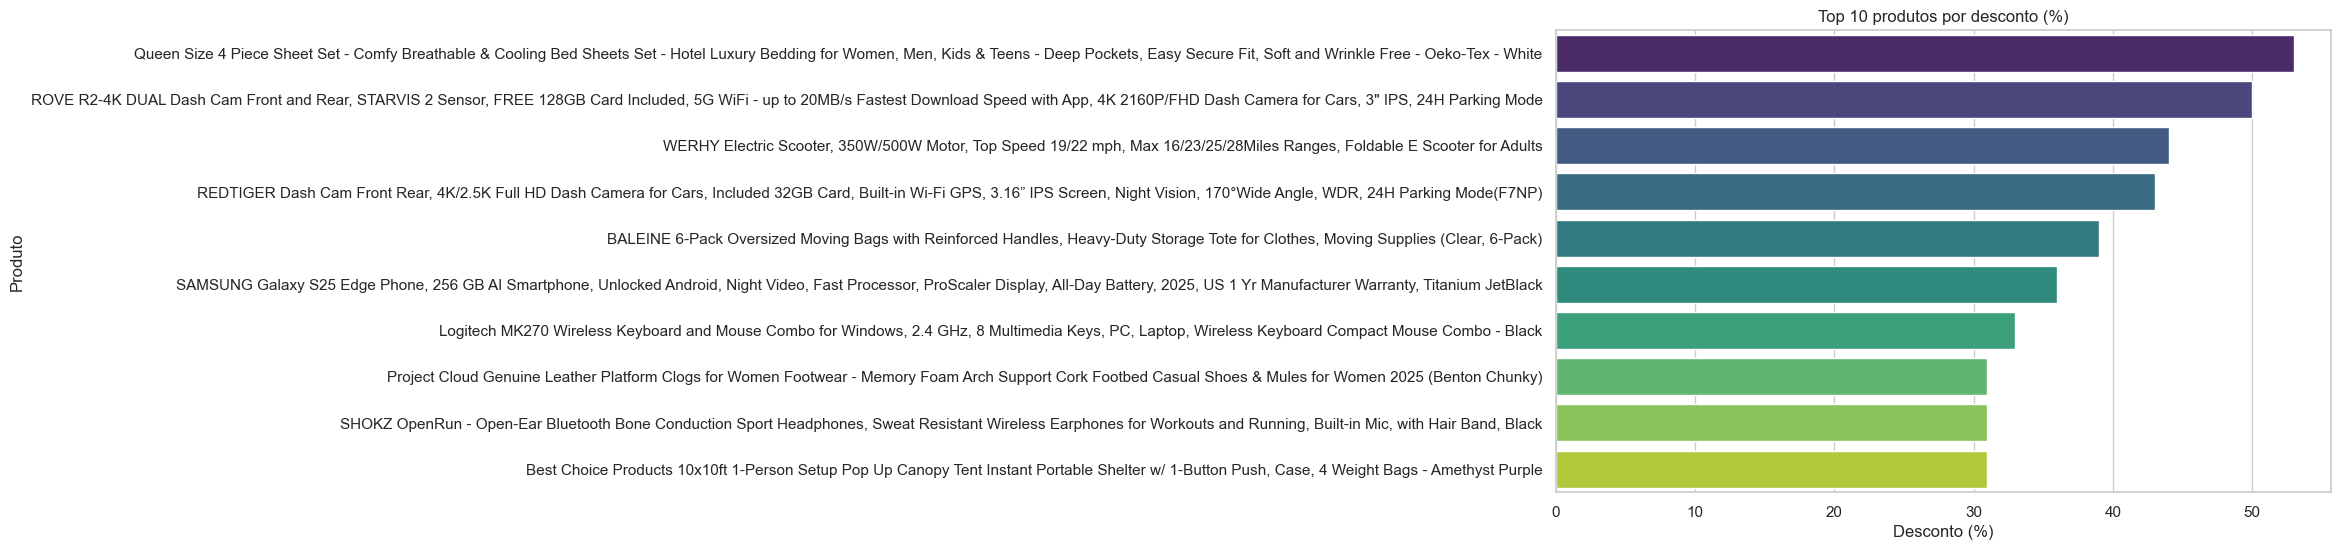

In [ ]:
#Gráfico 1: Top 10 maiores descontos (%)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
top10 = df_join.sort_values(by="savings_percentage", ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10,
    y="deal_title", x="savings_percentage",
    palette="viridis"
)
ax.set_xlabel("Desconto (%)")
ax.set_ylabel("Produto")
ax.set_title("Top 10 produtos por desconto (%)")
plt.tight_layout()
plt.savefig("top10_desconto_percentual.png", dpi=150)
plt.show()


In [23]:
print(df_join.columns)


Index(['product_asin', 'deal_type', 'deal_title', 'deal_url', 'deal_photo',
       'deal_state', 'deal_id', 'deal_price.amount', 'list_price.amount',
       'savings_amount.amount', 'deal_price.currency', 'savings_percentage',
       'deal_starts_at', 'deal_ends_at'],
      dtype='object')


In [ ]:
#Vitrine visual com layout em grade

import pandas as pd
from IPython.display import display, HTML

# Seleciona os produtos com maior desconto
top_produtos = df_join.sort_values(by="savings_percentage", ascending=False).head(12)

# Gera HTML com estilo de grid
html = """
<div style="display:flex; flex-wrap:wrap; justify-content:center; font-family:sans-serif;">
"""

for _, row in top_produtos.iterrows():
    try:
        preco = float(row["deal_price.amount"])
        preco_formatado = f"R$ {preco:.2f}"
    except:
        preco_formatado = "Preço indisponível"

    try:
        desconto = float(row["savings_percentage"])
        desconto_formatado = f"{desconto:.0f}% OFF"
    except:
        desconto_formatado = ""

    html += f"""
    <div style="width:220px; margin:10px; border-radius:10px; box-shadow:0 2px 8px rgba(0,0,0,0.15); overflow:hidden;">
        <a href="{row['deal_url']}" target="_blank" style="text-decoration:none; color:inherit;">
            <img src="{row['deal_photo']}" style="width:100%; height:auto;">
            <div style="padding:10px;">
                <div style="font-weight:bold; font-size:14px; margin-bottom:6px;">{row['deal_title'][:60]}</div>
                <div style="color:green; font-size:13px;">{preco_formatado}</div>
                <div style="color:red; font-size:12px;">{desconto_formatado}</div>
            </div>
        </a>
    </div>
    """

html += "</div>"

# Exibir vitrine
display(HTML(html))
